# Broad Street Cholera Outbreak

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Broad Street Cholera Outbreak</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2020-01-21</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2017-07-30</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">broad_street_cholera_outbreak.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">snow_cholera_deaths.csv<br />sbiw_cholera_pumps.csv</td>
    </tr>
</table>

## In brevi

There was a severe outbreak of cholera in 1854 in the Soho district of London, England, which killed 616 people over one month. Dr. John Snow and Reverence Henry Whitehead linked the outbreak to contaminated water, identified the index case, and stopped the outbreak by having the Broad Street water pump disabled.

## Data

Download the data sets.

[snow_cholera_deaths.csv](https://drive.google.com/open?id=0BzrdQfHR2I5DSE5NWFZlQXV5VnM). The x-y values are the distances in m from the lower left datum of the map. Each pair represents one death. There are 578 values, slightly less than the 616 actual deaths.

[snow_cholera_pumps.csv](https://drive.google.com/open?id=0BzrdQfHR2I5DSDd2emxObk9HUDA). The x-y values are the distances in m from the lower left datum of the map. Each pair represents one pump. There are 13 values, representing 13 pumps.

## Methodology

Two plots are drawn on the same grid using a scatter plot with pandas.DataFrame.plot.scatter. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.axes as axes


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
c = cm.Paired.colors

In [3]:
def main():
    deaths = pd.read_csv('snow_cholera_deaths.csv')
    pumps = pd.read_csv('snow_cholera_pumps.csv')
    legend1, legend2 = ('Deaths', 'Pumps')
    axis_title, axis_subtitle = ('Broad Street Cholera Outbreak of 1854',
                                 'Soho, London, UK')
    x_axis_label, y_axis_label = ('Distance from datum (m)',
                                  'Distance from datum (m)')
    file_graph = 'broad_street_cholera_outbreak.svg'
    plot_broad_street(deaths, legend1, pumps, legend2,
                      axis_title, axis_subtitle,
                      y_axis_label, x_axis_label, file_graph)

In [4]:
def despine(ax: axes.Axes) -> None:
    """
    Remove the top and right spines of a graph.

    Parameters
    ----------
    ax : axes.Axes

    Example
    -------
    >>> despine(ax)
    """
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [5]:
def plot_broad_street(df1: pd.DataFrame,
                      legend1: str,
                      df2: pd.DataFrame,
                      legend2: str,
                      axis_title: str,
                      axis_subtitle: str,
                      y_axis_label: str,
                      x_axis_label: str,
                      file_graph: str) -> None:
    figure_width_height = (8, 6)
    fig = plt.figure(figsize=figure_width_height)
    ax = fig.add_subplot(111)
    ax.plot(df1['x'], df1['y'], label=legend1, marker='.',
            linestyle='None',markersize=3, color=c[0])
    ax.plot(df2['x'], df2['y'], label=legend2, marker='.',
            linestyle='None', markersize=5, color=c[1])
    despine(ax)
    ax.set_title(axis_title + '\n' + axis_subtitle, fontweight='bold')
    ax.set_ylabel(y_axis_label, fontweight='bold')
    ax.set_xlabel(x_axis_label, fontweight='bold')
    ax.legend(frameon=False)
    ax.figure.savefig(file_graph, format='svg')

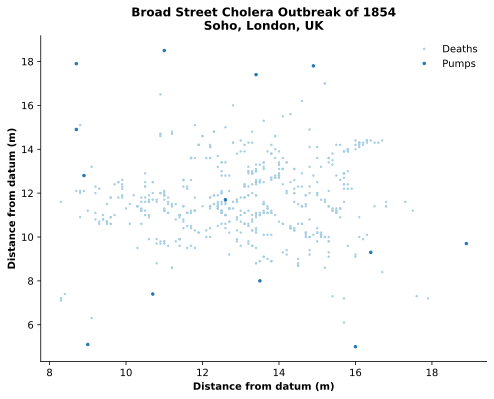

In [6]:
if __name__ == '__main__':
    main()

# References

[John Snow site at UCLA](http://www.ph.ucla.edu/epi/snow.html).

[John Snow's cholera data](http://www.math.uah.edu/stat/data/Snow.html)

Johnson, Steven. *Ghost Map*. 2006. Riverhead Books: New York, NY.

[Wikipedia 1854 Broad Street cholera outbreak](https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak)